# Finance Data Project

## Explore bank stocks from 2006 to 2016:

Bank of America

CitiGroup

Goldman Sachs

JPMorgan Chase

Morgan Stanley

Wells Fargo

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [3]:
df=pd.read_pickle('all_banks')

In [4]:
#check the table
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
#grab in multi-level index, BAC data
df.xs('BAC',1).head()

Stock Info   Open   High    Low  Close    Volume
Date                                            
2006-01-03  46.92  47.18  46.15  47.08  16296700
2006-01-04  47.00  47.24  46.45  46.58  17757900
2006-01-05  46.58  46.83  46.32  46.64  14970900
2006-01-06  46.80  46.91  46.35  46.57  12599800
2006-01-09  46.72  46.97  46.36  46.60  15620000

In [8]:
#find the max Close price for BAC
max_close=df.xs('BAC',1)['Close'].max()
max_close

54.9

In [9]:
#max close price for each bank
df.xs('Close',1,level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [10]:
#Calculate daily percent change of each bank (pt-p(t-1))/p(t-1)
returns=df.xs('Close',1,level=1).pct_change()
returns.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03        NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use plot to find patterns

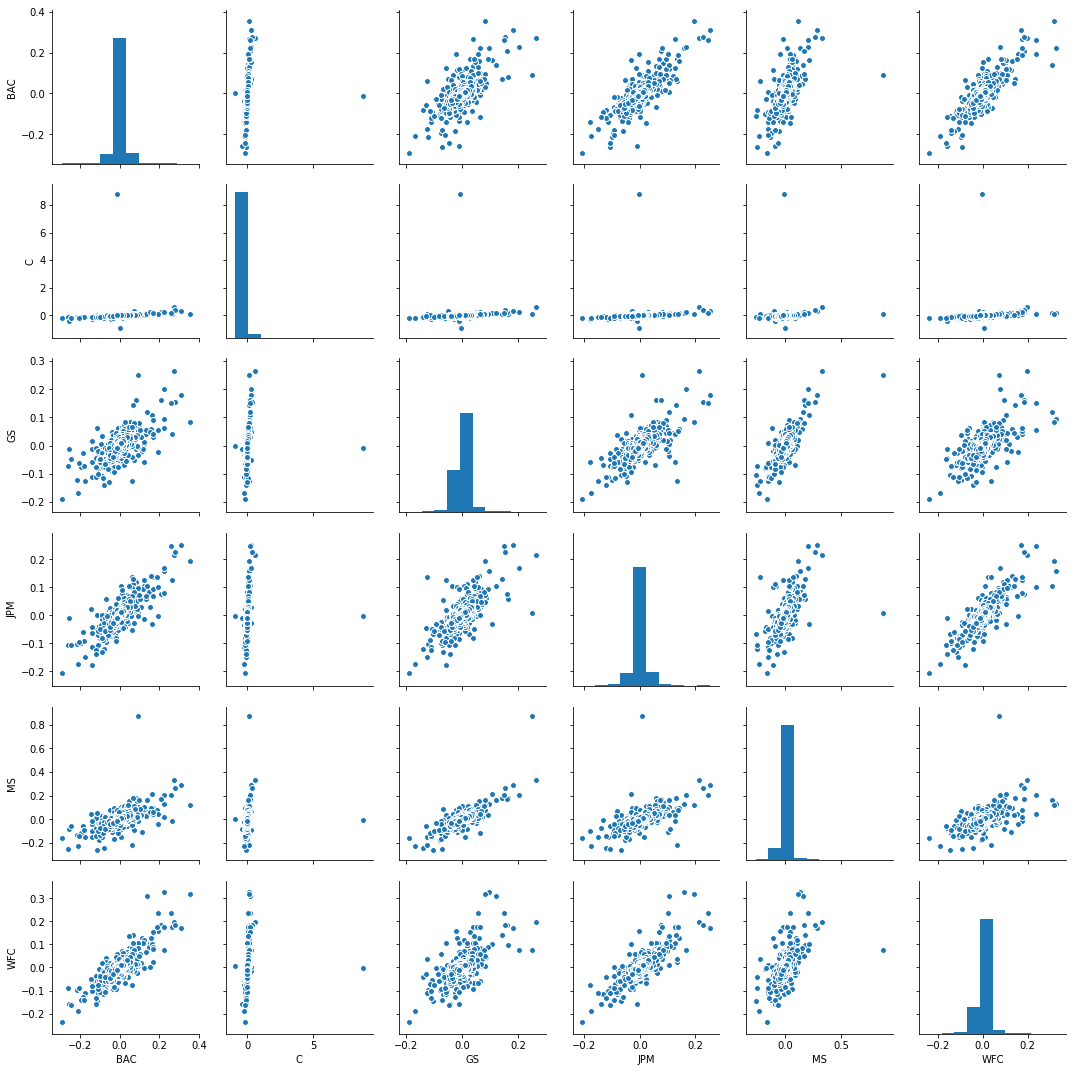

In [16]:
sns.pairplot(returns.dropna())

Citibank is strange here, found out it was because its stock price crashed on 2018

In [112]:
#Find the citi bank the max returns day
returns[returns['C']==returns['C'].max(axis=0)]

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2011-05-09  -0.010561  8.769912 -0.006529 -0.001776 -0.006339 -0.001416

In [129]:
#Find each bank lowest return day
returns.idxmin()

Bank Ticker
BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [127]:
#Find each bank highest return day
returns.idxmax()

Bank Ticker
BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [138]:
#Standard deviation by bank
returns.std()

Bank Ticker
BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

Can see C(citi) is risky investment

In [50]:
#set index t datetime, creat year column and month column
returns['year']=pd.to_datetime(returns.index).year
returns['month']=pd.to_datetime(returns.index).month
returns.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC  year  \
Date                                                                            
2006-01-03        NaN       NaN       NaN       NaN       NaN       NaN  2006   
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599  2006   
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951  2006   
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714  2006   
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000  2006   

Bank Ticker  month  
Date                
2006-01-03       1  
2006-01-04       1  
2006-01-05       1  
2006-01-06       1  
2006-01-09       1

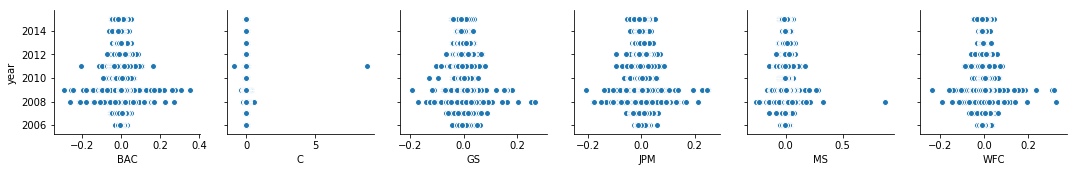

In [52]:
#plot shows all banks went through waves during 2008 and 2009, and variance start getting lower since 2011
sns.pairplot(returns.dropna(), x_vars=['BAC','C','GS','JPM','MS','WFC'],y_vars=['year'])

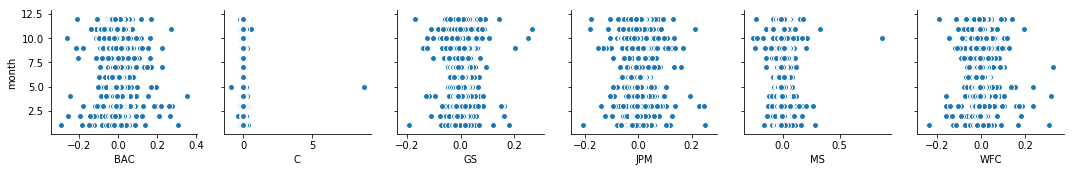

In [53]:
#Interestingly, the stock price seems to be steadier during May, June, and July, reasons?
sns.pairplot(returns.dropna(), x_vars=['BAC','C','GS','JPM','MS','WFC'],y_vars=['month'])

In [38]:
#Std of year 2015, now citi is steady
returns[returns['year']==2015].std()

Bank Ticker
BAC     0.016163
C       0.015289
GS      0.014046
JPM     0.014017
MS      0.016249
WFC     0.012591
year    0.000000
dtype: float64

D:\Python\Python\anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


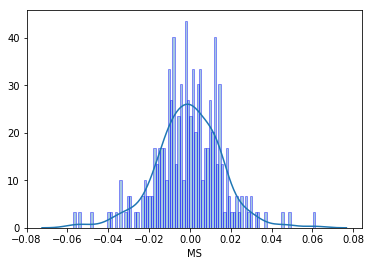

In [54]:
#Distribution plot of returns of year 2015 of Morgan Stanley
ms_plot=returns[returns['year']==2015]['MS']
sns.distplot(ms_plot,bins=100,hist_kws={'edgecolor':'b'})

D:\Python\Python\anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


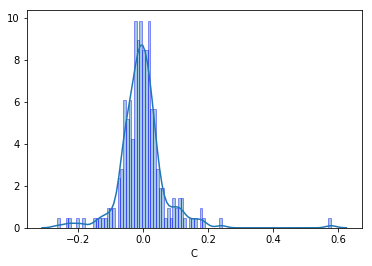

In [55]:
#Distribution plot of returns of year 2008 of CITI
c_plot=returns[returns['year']==2008]['C']
sns.distplot(c_plot,bins=100,hist_kws={'edgecolor':'b'})

In [65]:
import cufflinks as cf
import plotly
cf.go_offline()

In [60]:
#Check the close price
df.xs('Close',1,level=1).head()

Bank Ticker    BAC      C      GS    JPM     MS    WFC
Date                                                  
2006-01-03   47.08  492.9  128.87  40.19  58.31  31.90
2006-01-04   46.58  483.8  127.09  39.62  58.35  31.53
2006-01-05   46.64  486.2  127.04  39.74  58.51  31.50
2006-01-06   46.57  486.2  128.84  40.02  58.57  31.68
2006-01-09   46.60  483.9  130.39  40.67  59.19  31.68

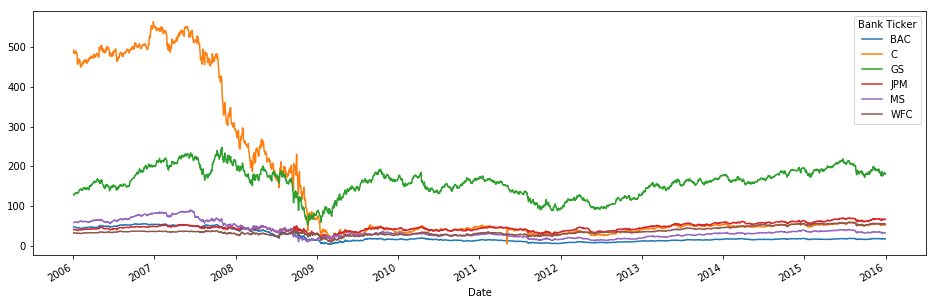

In [66]:
#plot the close price
df.xs('Close',1,level=1).plot(figsize=(16,5))

Interactive plots of Bank of America BAC

In [62]:
#set 30-day moving average
bac_close=pd.DataFrame(df.xs('Close',axis=1,level=1)['BAC'])
bac_close['moving mean']=bac_close['BAC'].rolling(30).mean()

In [63]:
#set date_time using list
bac_close['year']=pd.to_datetime(list(bac_close.reset_index()['Date'])).year

In [67]:
bac_close[['BAC','moving mean']][bac_close['year']==2008].iplot()

Draw heatmap and clustermap to check out correlations

In [280]:
df.xs('Close',axis=1,level=1).corr()
sns.heatmap(df.xs('Close',axis=1,level=1).corr(),annot=True)

In [319]:
sns.clustermap(df.xs('Close',axis=1,level=1).corr(),figsize=(6,6),annot=True)

In [68]:
#Candle grapg of BAC from 2015-01-01 to 2010-01-01
df['BAC'].ix['2008-01-01':'2010-01-01'].iplot('candle')

D:\Python\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [69]:
#Simple Moving Averages(SMA) plot of MS from 2013-01-01 to 2016-01-01
df['MS']['Close'].ix['2013-01-01':'2016-01-01'].ta_plot(study='sma')

D:\Python\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [70]:
#Bollinger Band Plot of MS from 2015-01-02 to 2012-12-31
df['MS']['Close'].ix['2015-01-02':'2015-12-31'].ta_plot(study='boll')

D:\Python\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



* Can use ix to select time period

In [77]:
df.ix['2010-04-04':'2015-03-01'].head()

Bank Ticker    BAC                                     C                    \
Stock Info    Open   High    Low  Close     Volume  Open  High   Low Close   
Date                                                                         
2010-04-05   18.16  18.25  18.02  18.13  107989225  42.7  42.8  42.3  42.6   
2010-04-06   18.16  18.54  18.10  18.49  160316545  42.7  43.0  42.5  42.9   
2010-04-07   18.58  18.86  18.53  18.62  233522264  43.1  44.0  43.0  43.6   
2010-04-08   18.59  18.84  18.31  18.65  164305406  43.5  44.9  43.1  44.7   
2010-04-09   18.82  18.85  18.50  18.59  135480518  45.4  45.7  45.2  45.5   

Bank Ticker              ...        MS                                   WFC  \
Stock Info     Volume    ...      Open   High    Low  Close    Volume   Open   
Date                     ...                                                   
2010-04-05   34453327    ...     29.28  29.49  29.13  29.29  11429691  31.49   
2010-04-06   31812189    ...     29.25  29.62  28.96  29.36  13643730  31.36   
2010-04-07   62152796    ...     29.31  30.37  29.25  30.02  21880895  32.28   
2010-04-08   55935615    ...     29.90  30.95  29.73  30.88  20876557  31.79   
2010-04-09   66445998    ...     31.10  31.45  30.75  30.98  18781431  32.40   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2010-04-05   31.75  31.26  31.51  30823818  
2010-04-06   32.39  31.35  32.28  39504856  
2010-04-07   32.49  31.77  31.99  34516272  
2010-04-08   32.41  31.56  32.23  32203535  
2010-04-09   32.65  31.92  32.30  27108650  

[5 rows x 30 columns]